In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from lightgbm import LGBMRegressor

In [67]:
data = pd.read_csv(r"https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [68]:
cat = data.select_dtypes(include=['object']).columns
data[cat[2]].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [69]:
sexcat= {'male': 0, 'female': 1}
smokecat = {'yes': 1, 'no': 0}
regioncat = {'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}

data['sex'] = data['sex'].map(sexcat)
data['smoker'] = data['smoker'].map(smokecat)
data['region'] = data['region'].map(regioncat)

In [70]:
data.info()
data.isnull().sum()
data.drop_duplicates(inplace = True)
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


np.int64(0)

In [71]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('charges', axis=1), data['charges'], test_size=0.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

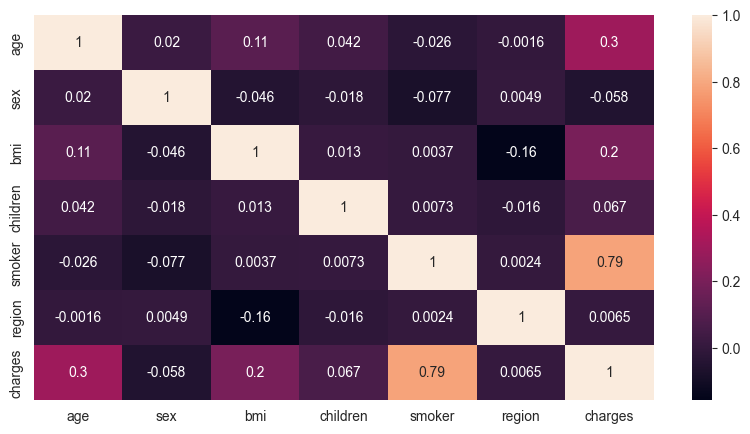

In [72]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()

In [73]:
models = [GradientBoostingRegressor, AdaBoostRegressor, LGBMRegressor]
for i in models:
    model = i()
    model.fit(x_train,y_train)
    ypred =  model.predict(x_test)
    print("MSE: ", np.sqrt(mean_squared_error(y_test,ypred)))
    print("R2 SCORE: ", r2_score(y_test,ypred))

MSE:  4253.223537169148
R2 SCORE:  0.901554756565293
MSE:  5022.971068838376
R2 SCORE:  0.8626971115753531
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 6
[LightGBM] [Info] Start training from score 13030.203373
MSE:  4548.472554349847
R2 SCORE:  0.8874126811235652


D:\Data Science\Project1\First\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [74]:
from sklearn.model_selection import cross_val_score

model = GradientBoostingRegressor()
model.fit(x_train,y_train)
ypred =  model.predict(x_test)
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
print("Each Fold R2:", scores)
print("Mean R2:", scores.mean())

Each Fold R2: [0.80550008 0.85406373 0.83305358 0.83741236 0.84087294]
Mean R2: 0.8341805377787128
